# **Week3 복습과제**



이번 복습과제에서는 두 가지 레이어에 대한 내용을 다룹니다. `ReLU 활성화 함수와 조합된 convolution layer`와 `maximum pooling layer`입니다.
각각에 대해 알아보고 사진에 적용하는 실습을 해보겠습니다.

Convolution layer, ReLU 활성화 함수, 그리고 maximum pooling layer는 특성 추출 과정에서 각각 다음과 같은 역할을 합니다.
- 이미지를 특정 특징에 맞게 필터링  ->  Convolution Layer
- 필터링된 이미지에서 해당 특징을 감지  ->  ReLU Activation Function
- 특징을 강조하기 위해 이미지를 압축  ->  Maximum Pooling Layer

아래 이미지에서는 이 세 가지 연산이 원본 이미지의 가로 선 특징을 추출해낸 것을 볼 수 있습니다.
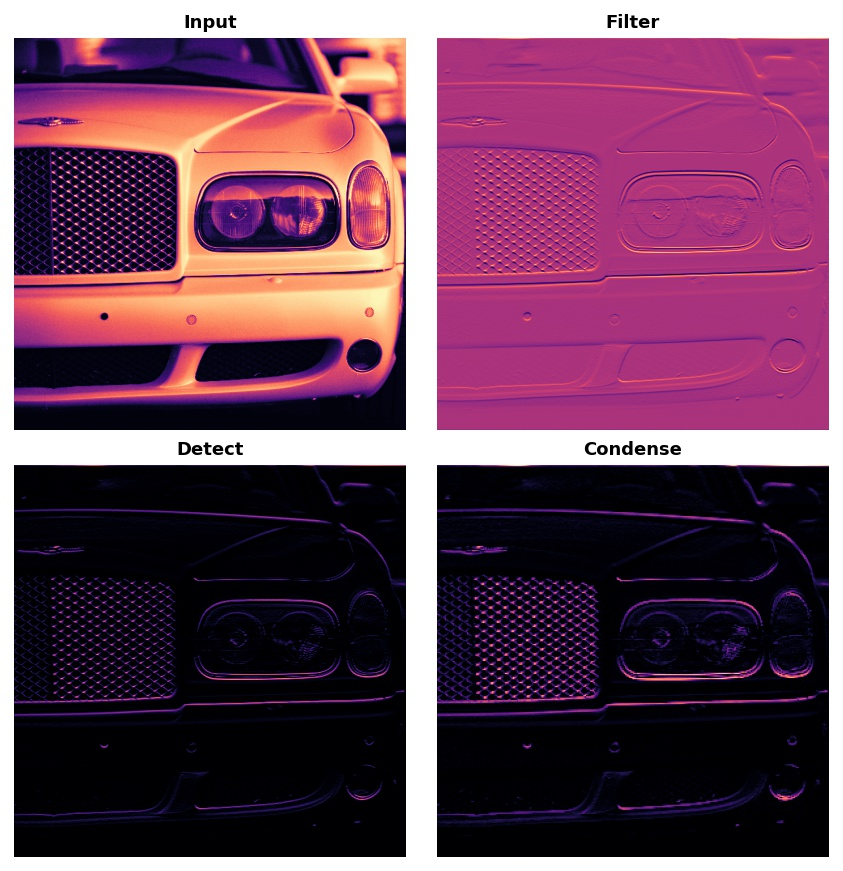



<a id="1"></a> <br>
## 1. Convolution Layer

- Convolution layer는 keras 모델에서 아래의 코드와 같이 정의할 수 있습니다.

 - keras 모델은 keras 라이브러리를 사용하여 구축된 딥러닝 모델을 말합니다.
 - 복잡한 신경망 모델을 간단한 코드로 만들 수 있게 도와줍니다.
   - `Conv2D` layer를 설정해주세요.




In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3), # 활성화 함수 X
    # 더 많은 레이어가 추가될 수 있습니다.
    # 은닉층, 추가 컨볼루션층, 출력층 등.
])

<a id="1"></a> <br>
## 2. ReLU Activation Function

- 위의 convolution layer에 ReLU를 적용시켜봅시다.

In [2]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu') # 활성화 함수로 ReLU가 선택된 것을 볼 수 있음.
    # 더 많은 레이어가 추가될 수 있습니다.
])

<a id="1"></a> <br>
## 3. Maximum Pooling Layer

- 앞서 구축한 keras 모델에 maximum pooling layer를 추가해봅시다.
 - keras에서는 `MaxPool2D` layer가 사용됩니다.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3),
    layers.MaxPool2D(pool_size=2),
    # 더 많은 레이어가 추가될 수 있습니다.
])

<a id="1"></a> <br>
## 4. 예제

- 예제에서는 Convolution layer가 안 보이는 곳에서 수행하는 작업을 더 잘 이해하기 위해 직접 특징 추출 과정을 진행해보겠습니다.
 - 첨부된 이미지 파일을 준비해주세요.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


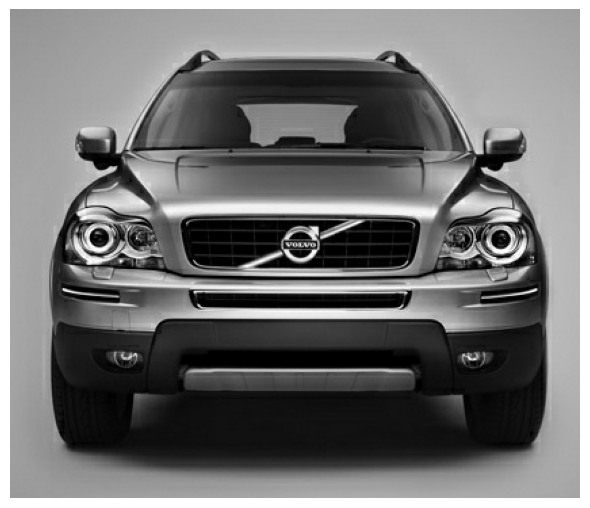

In [16]:
# 이 셀을 실행시켜주세요!
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = '/content/drive/MyDrive/Euron_9thDL/car_feature.jpg'  #첨부된 이미지 파일을 사용해주세요
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

In [17]:
# 이 셀을 실행해주세요!
import numpy as np
from itertools import product

def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val,
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

#### **Kernel로 필터링**
- 필터링 단계에서는 kernel을 직접 정의한 후 convolution을 사용하여 적용하겠습니다.
- 이렇게 하면 TensorFlow에서 사용하는 **텐서(tensor)** 형태로 커널이 생성됩니다.

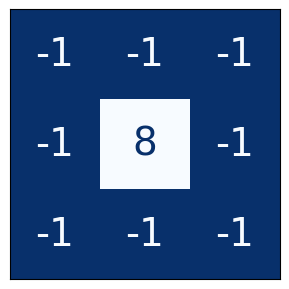

In [8]:
import tensorflow as tf

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(3, 3))
show_kernel(kernel)

In [18]:
# 이 셀을 실행해주세요!
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

- 이제 커널을 이미지에 적용시켜봅시다.
 - `input=image`
 - `filters=kernel`

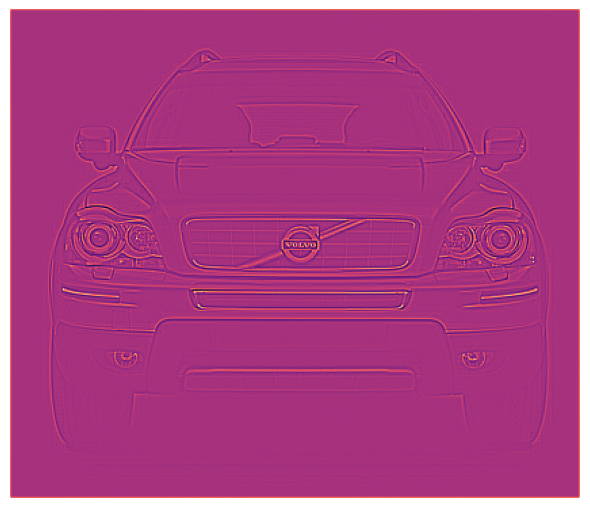

In [10]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

**해당 셀의 마크 다운을 풀고 우리가 생성한 커널이 이미지의 어떤 특성을 추출했는지 해석해주세요.** 🤗



---
**[해석]**
-  경계/윤곽 위주로 추출, 밝기 변화가 급격한 지점
-  방향에 구애받지않는 등방성 엣지



#### **ReLU로 특성 감지**
- 다음으로, ReLU 함수로 특성을 감지하게끔 하겠습니다.

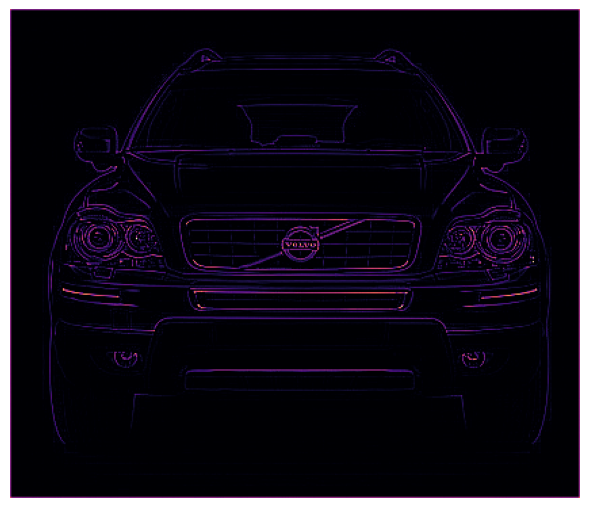

In [11]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

#### **Maximum Pooling으로 압축**
- 이제 마지막으로 풀링 단계를 적용해보겠습니다.
 - tf.nn의 또 다른 함수인 tf.nn.pool을 사용하겠습니다.
 - 이 함수는 모델을 만들 때 사용하는 MaxPool2D 레이어와 동일한 역할을 하지만, 단순한 Python 함수이므로 직접 사용하기에 더 편리합니다.
 - 이 함수에서는 window_shape가 pooling 크기를 나타냅니다!
   - `input = image_detect`
   - `window_shape=(2, 2)`
   - `pooling_type='MAX'`


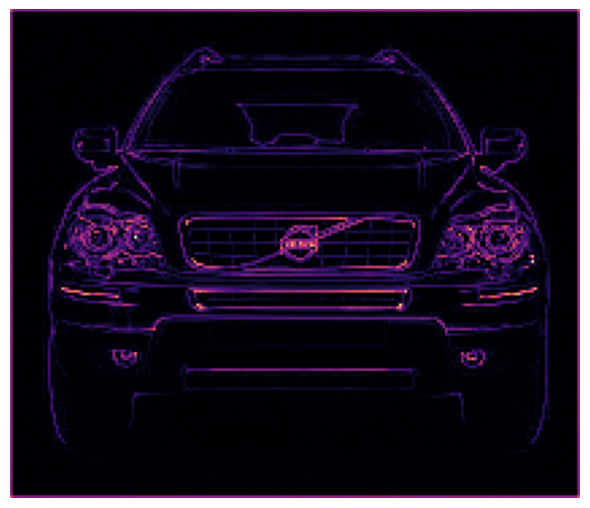

In [13]:
import tensorflow as tf

image_condense = tf.nn.pool(
    input=image_detect,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show();

<a id="1"></a> <br>
## 5. 직접 이미지 특성 추출해보기!

1️⃣ **실험 1: 직접 이미지의 특성 추출하기**
- 예제의 과정을 본인이 원하는 커널을 만들어 진행해주세요.
 - 새로운 임의의 커널 `my_kernel`을 생성한 뒤 출력해주세요.
 - 커널을 이미지에 적용한 뒤 출력해주세요.
 - ReLU 함수를 사용해주세요.
 - Maximum pooling을 진행해주세요.
- 마지막 셀의 마크다운을 풀고, 본인이 수행한 작업이 이미지의 어떤 특성을 추출했는지 설명해주세요.

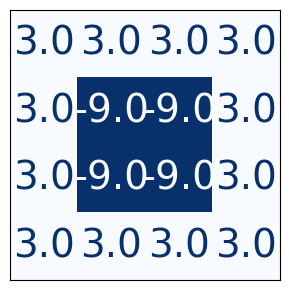

In [34]:
my_kernel = tf.constant([
    [ 3,  3,  3, 3],
    [ 3, -9, -9, 3],
    [ 3, -9, -9, 3],
    [ 3,  3,  3, 3],
], dtype=tf.float32)

plt.figure(figsize=(3, 3))
show_kernel(my_kernel)

In [40]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
my_kernel = tf.reshape(my_kernel, [*my_kernel.shape, 1, 1])
my_kernel = tf.cast(my_kernel, dtype=tf.float32)

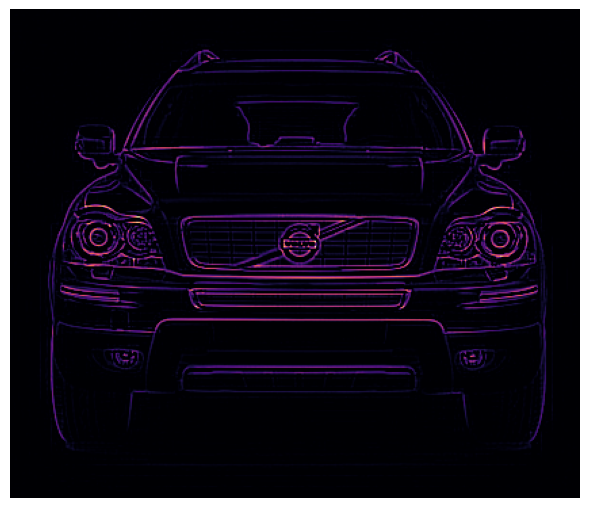

In [45]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=my_kernel,
    strides=[1,1,1,1],
    padding='SAME',
)

image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();


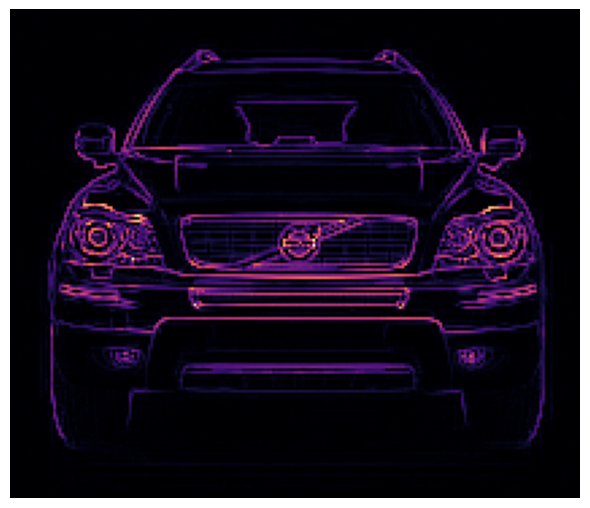

In [46]:
import tensorflow as tf

image_condense = tf.nn.pool(
    input=tf.squeeze(image_detect, axis=[1,2]),
    window_shape=[2,2],
    strides=[2,2],
    pooling_type='MAX',
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show();

**해당 셀의 마크 다운을 풀고 예제 코드와 어떤 점을 다르게 변형했고 이미지의 어떤 특성을 추출했는지 해석해주세요.**



---
**[차이점]**
- kernel의 크기를 (4,4)로 늘렸고
예시에서는 중심에 양수가 들어갔지만 반대로 중심에 음수를 넣고 주위를 음수로 둘렀다
**[해석]**
- 예시보다 좀 더 차량의 전등이 강조된 느낌이 든다, 가운데부분이 더 선명해진 것 같다.
